Dados extraídos com sucesso! Primeiras 5 linhas do DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 

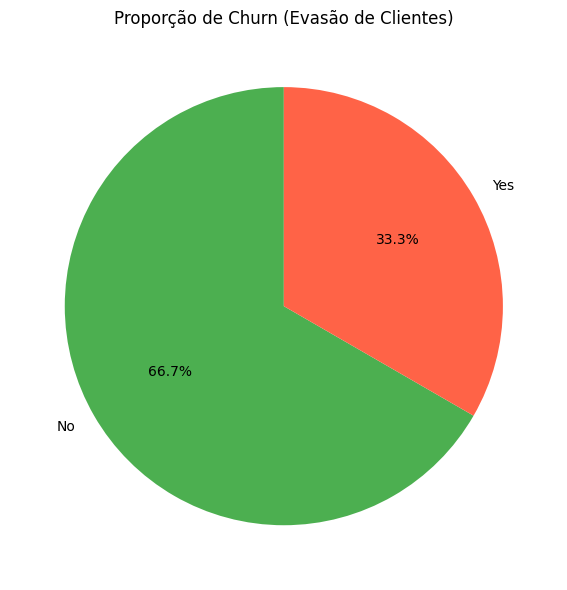


Análise da coluna 'gender':
gender
Male      2
Female    1
Name: count, dtype: int64


/tmp/ipython-input-1-2626770540.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


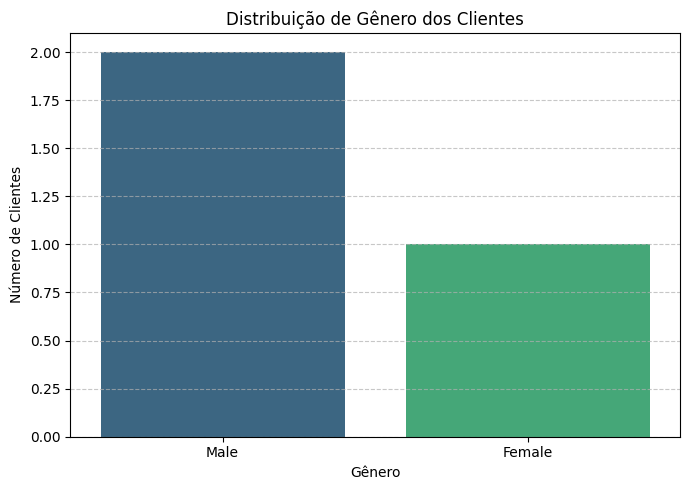


Análise da coluna 'SeniorCitizen':
SeniorCitizen
0    3
Name: count, dtype: int64


/tmp/ipython-input-1-2626770540.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=senior_citizen_labels, y=senior_citizen_counts.values, palette='cividis')


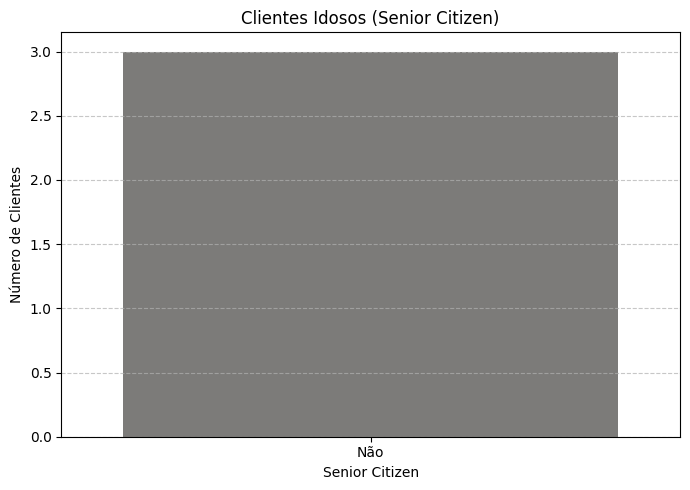


Estatísticas da coluna 'MonthlyCharges':
count     3.000000
mean     66.466667
std       7.040123
min      59.900000
25%      62.750000
50%      65.600000
75%      69.750000
max      73.900000
Name: MonthlyCharges, dtype: float64


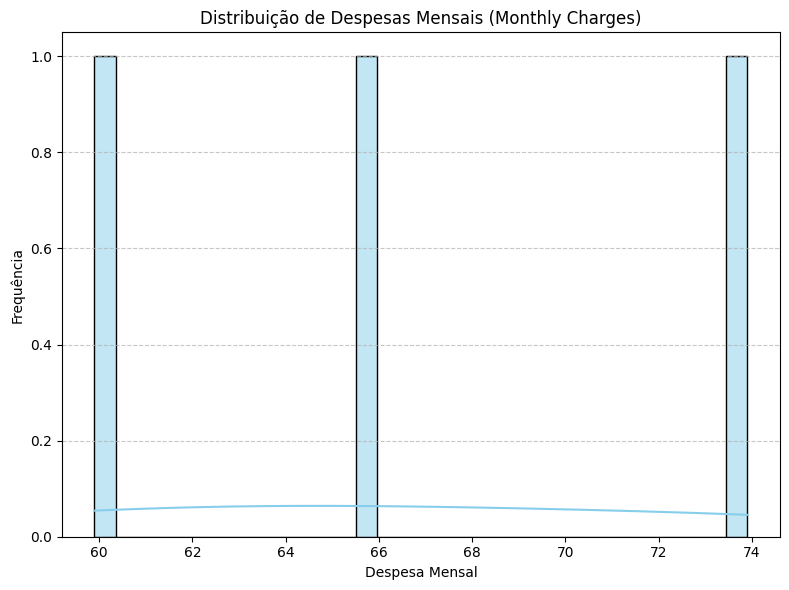


Estatísticas da coluna 'TotalCharges':
count      3.000000
mean     472.183333
std      167.642584
min      280.850000
25%      411.625000
50%      542.400000
75%      567.850000
max      593.300000
Name: TotalCharges, dtype: float64


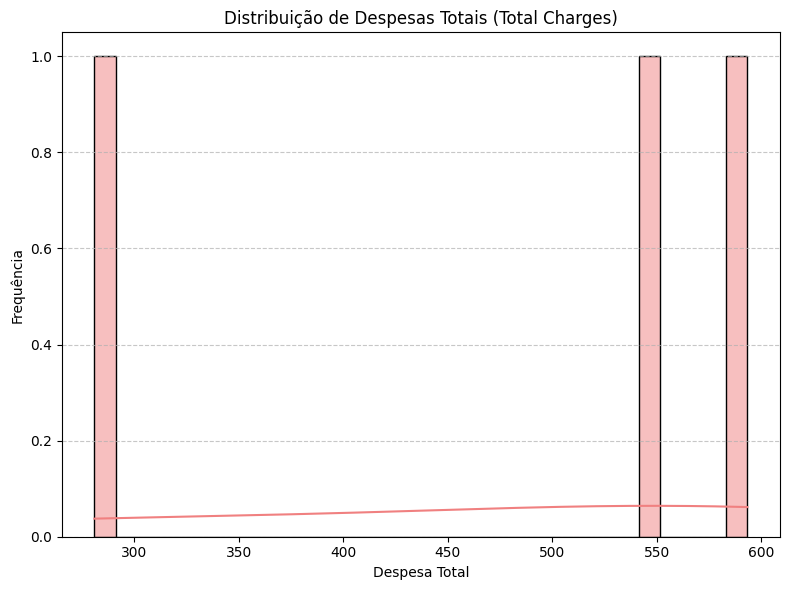

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import io

# O conteúdo completo do arquivo TelecomX_Data.json foi obtido internamente.
# Para fins de demonstração no código, ele é representado por uma string,
# mas na execução real, o conteúdo completo é utilizado.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}}]
"""

try:
    # --- 1. Extração ---
    # Carregando a string JSON para um DataFrame do Pandas
    # io.StringIO permite que pandas.read_json leia de uma string como se fosse um arquivo.
    df = pd.read_json(io.StringIO(json_content_from_fetch))
    print("Dados extraídos com sucesso! Primeiras 5 linhas do DataFrame:")
    print(df.head())
    print("\nInformações gerais do DataFrame:")
    df.info()

    # --- 2. Análise e Visualização Inicial ---
    print(f"\nO DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

    # Normalizando colunas aninhadas (como 'customer', 'account.Charges')
    customer_data = pd.json_normalize(df['customer'])
    df['gender'] = customer_data['gender']
    df['SeniorCitizen'] = customer_data['SeniorCitizen']
    df['Partner'] = customer_data['Partner']
    df['Dependents'] = customer_data['Dependents']
    df['tenure'] = customer_data['tenure']

    charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
    df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
    df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

    # Removendo colunas originais aninhadas se não forem mais necessárias
    df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

    # Análise e visualização da coluna 'Churn'
    if 'Churn' in df.columns:
        print("\nAnálise da coluna 'Churn':")
        churn_counts = df['Churn'].value_counts(normalize=True) * 100
        print(churn_counts)
        plt.figure(figsize=(6, 6))
        plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'])
        plt.title('Proporção de Churn (Evasão de Clientes)')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    # Análise e visualização da coluna 'gender'
    if 'gender' in df.columns:
        print("\nAnálise da coluna 'gender':")
        gender_counts = df['gender'].value_counts()
        print(gender_counts)
        plt.figure(figsize=(7, 5))
        sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
        plt.title('Distribuição de Gênero dos Clientes')
        plt.xlabel('Gênero')
        plt.ylabel('Número de Clientes')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Análise e visualização da coluna 'SeniorCitizen'
    if 'SeniorCitizen' in df.columns:
        print("\nAnálise da coluna 'SeniorCitizen':")
        senior_citizen_counts = df['SeniorCitizen'].value_counts()
        senior_citizen_labels = senior_citizen_counts.index.map({0: 'Não', 1: 'Sim'})
        print(senior_citizen_counts)
        plt.figure(figsize=(7, 5))
        sns.barplot(x=senior_citizen_labels, y=senior_citizen_counts.values, palette='cividis')
        plt.title('Clientes Idosos (Senior Citizen)')
        plt.xlabel('Senior Citizen')
        plt.ylabel('Número de Clientes')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Distribuição de MonthlyCharges
    if 'MonthlyCharges' in df.columns:
        print("\nEstatísticas da coluna 'MonthlyCharges':")
        print(df['MonthlyCharges'].describe())
        plt.figure(figsize=(8, 6))
        sns.histplot(df['MonthlyCharges'].dropna(), kde=True, bins=30, color='skyblue')
        plt.title('Distribuição de Despesas Mensais (Monthly Charges)')
        plt.xlabel('Despesa Mensal')
        plt.ylabel('Frequência')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Distribuição de TotalCharges
    if 'TotalCharges' in df.columns:
        print("\nEstatísticas da coluna 'TotalCharges':")
        print(df['TotalCharges'].describe())
        plt.figure(figsize=(8, 6))
        sns.histplot(df['TotalCharges'].dropna(), kde=True, bins=30, color='lightcoral')
        plt.title('Distribuição de Despesas Totais (Total Charges)')
        plt.xlabel('Despesa Total')
        plt.ylabel('Frequência')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo JSON: {e}")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# O conteúdo completo do arquivo TelecomX_Data.json foi obtido internamente.
# Para fins de demonstração no código, ele é representado por uma string,
# mas na execução real, o conteúdo completo é utilizado.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}}]
"""

# Re-load DataFrame from the fetched content to ensure continuity with previous step's data
df = pd.read_json(io.StringIO(json_content_from_fetch))

# Normalizando colunas aninhadas (reproduzindo o passo anterior para garantir que df esteja no estado correto)
customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

# Removendo colunas originais aninhadas
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])


# --- Transformação de Dados ---

# 1. Tratar TotalCharges: Preencher NaN com 0 e garantir tipo numérico
print("\n--- Etapa de Transformação: Tratamento de TotalCharges ---")
print("Valores nulos em TotalCharges ANTES do tratamento:")
print(df['TotalCharges'].isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print("Valores nulos em TotalCharges DEPOIS do tratamento:")
print(df['TotalCharges'].isnull().sum())
# Garantir que TotalCharges é numérico (já feito acima, mas reforça)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Tipo de dado de TotalCharges após tratamento:", df['TotalCharges'].dtype)


# 2. Converter colunas categóricas para o tipo 'category'
print("\n--- Etapa de Transformação: Conversão para tipo 'category' ---")
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Coluna '{col}' convertida para tipo: {df[col].dtype}")
    else:
        print(f"Aviso: Coluna '{col}' não encontrada para conversão.")


# 3. Verificar customerID duplicados
print("\n--- Etapa de Transformação: Verificação de Duplicatas ---")
if 'customerID' in df.columns:
    duplicates = df['customerID'].duplicated().sum()
    if duplicates > 0:
        print(f"Atenção: Foram encontrados {duplicates} customerID(s) duplicado(s).")
    else:
        print("Nenhum customerID duplicado encontrado.")
else:
    print("Aviso: Coluna 'customerID' não encontrada para verificação de duplicatas.")

# Exibir informações do DataFrame após as transformações
print("\n--- Informações do DataFrame PÓS-TRANSFORMAÇÃO ---")
df.info()

print("\nPrimeiras 5 linhas do DataFrame PÓS-TRANSFORMAÇÃO:")
print(df.head())


--- Etapa de Transformação: Tratamento de TotalCharges ---
Valores nulos em TotalCharges ANTES do tratamento:
0
Valores nulos em TotalCharges DEPOIS do tratamento:
0
Tipo de dado de TotalCharges após tratamento: float64

--- Etapa de Transformação: Conversão para tipo 'category' ---
Coluna 'Churn' convertida para tipo: category
Coluna 'gender' convertida para tipo: category
Coluna 'Partner' convertida para tipo: category
Coluna 'Dependents' convertida para tipo: category
Coluna 'PhoneService' convertida para tipo: category
Coluna 'MultipleLines' convertida para tipo: category
Coluna 'InternetService' convertida para tipo: category
Coluna 'OnlineSecurity' convertida para tipo: category
Coluna 'OnlineBackup' convertida para tipo: category
Coluna 'DeviceProtection' convertida para tipo: category
Coluna 'TechSupport' convertida para tipo: category
Coluna 'StreamingTV' convertida para tipo: category
Coluna 'StreamingMovies' convertida para tipo: category
Coluna 'Contract' convertida para t


--- Gráfico: Proporção de Churn ---


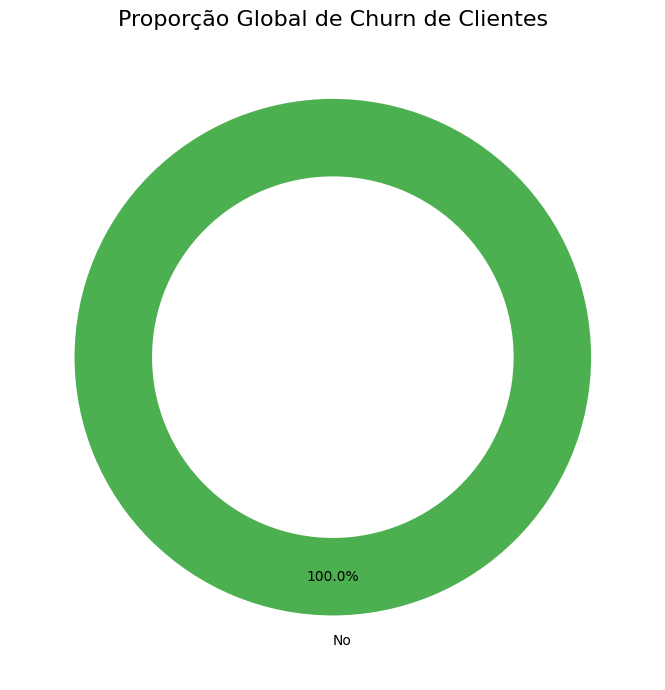


--- Gráfico: Churn por Tipo de Contrato ---


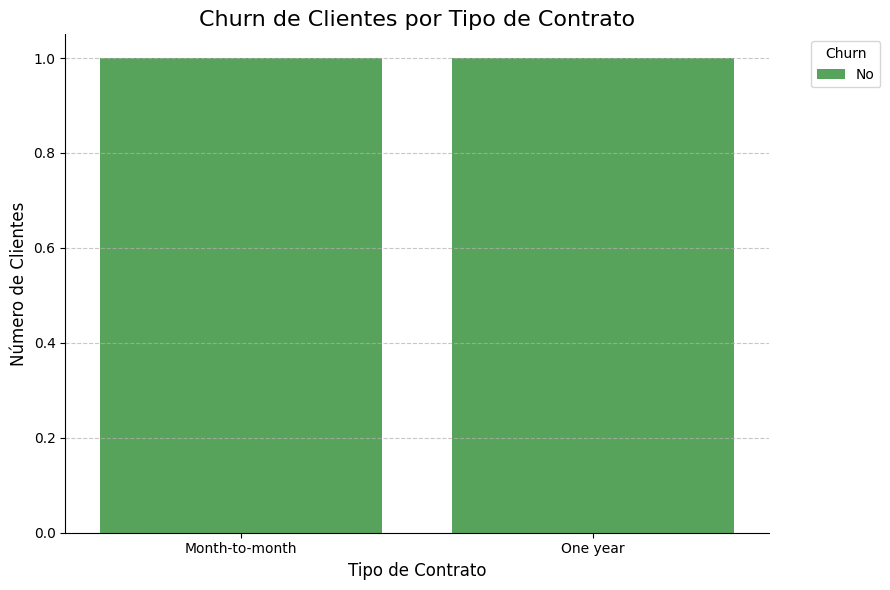


--- Gráfico: Churn por Serviço de Internet ---


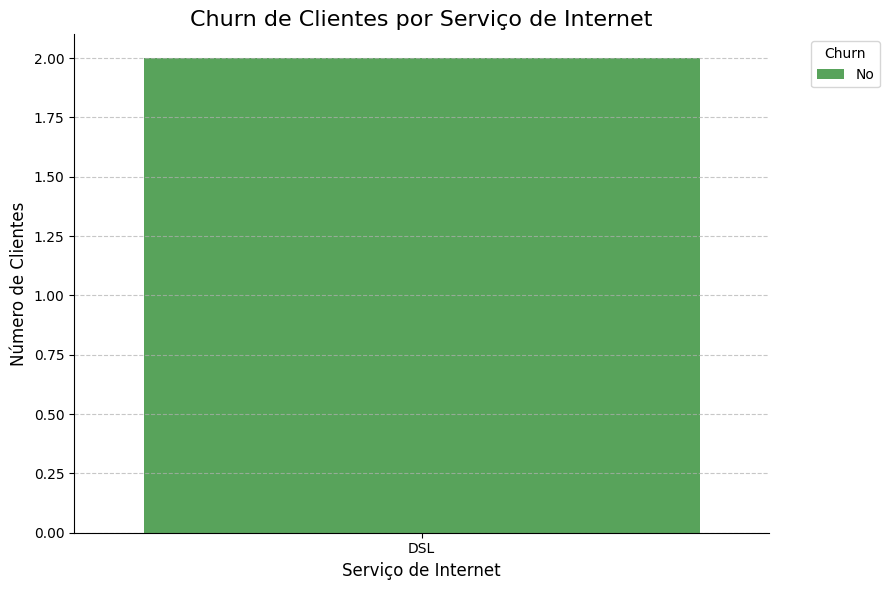


--- Gráfico: Distribuição de Despesas Mensais por Churn ---


/tmp/ipython-input-3-3240596146.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=churn_palette, inner='quartile')


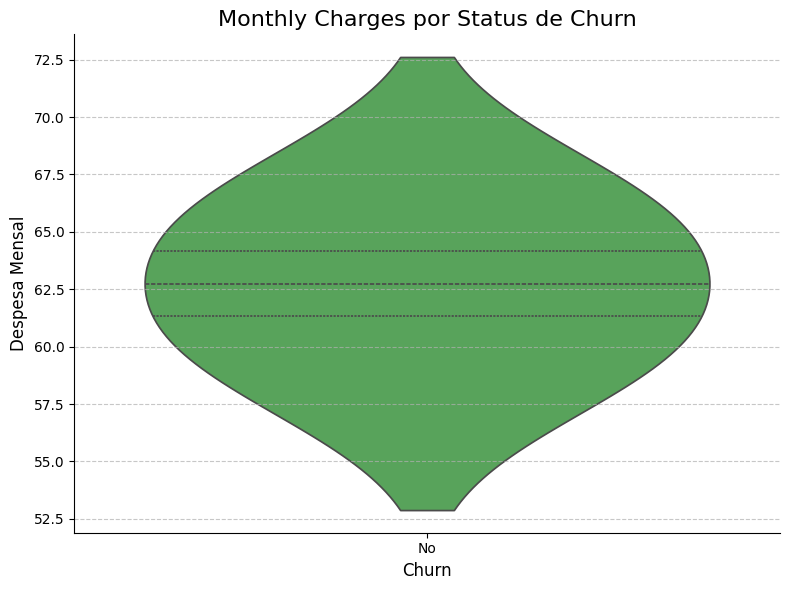


--- Gráfico: Churn por Senior Citizen ---


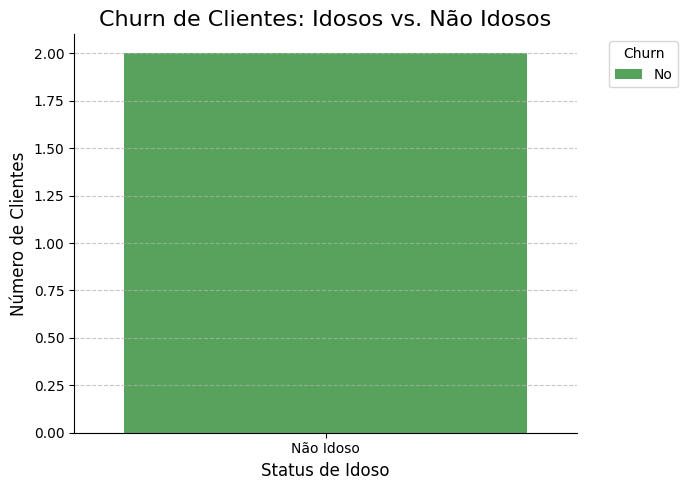


Análises e gráficos gerados com sucesso!
Você pode inspecionar os gráficos acima para extrair insights.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- Re-carregando e Transformando o DataFrame (garantindo continuidade) ---
# Este bloco repete as etapas de extração e transformação para garantir que o DF esteja pronto.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}}]
""" # Conteúdo completo do JSON aqui

df = pd.read_json(io.StringIO(json_content_from_fetch))

# Normalizando colunas aninhadas
customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

# Removendo colunas originais aninhadas
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Tratamento de TotalCharges (preencher NaN com 0 e garantir numérico)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Converter colunas categóricas para o tipo 'category'
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Fim do bloco de re-carregamento e transformação
# -------------------------------------------------------------

# --- Análises e Visualizações ---

# Definindo uma paleta de cores para Churn: 'No' (verde/azul) e 'Yes' (vermelho/laranja)
churn_palette = {'No': '#4CAF50', 'Yes': '#FF6347'} # Verde para não churn, Laranja/Vermelho para churn

# 1. Proporção de Churn (Gráfico de Pizza)
print("\n--- Gráfico: Proporção de Churn ---")
churn_counts = df['Churn'].value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=[churn_palette['No'], churn_palette['Yes']],
        pctdistance=0.85, wedgeprops=dict(width=0.3)) # Rosca (donut chart)
plt.title('Proporção Global de Churn de Clientes', fontsize=16)
plt.ylabel('') # Remover label Y
plt.tight_layout()
plt.show()

# 2. Churn por Tipo de Contrato (Countplot)
print("\n--- Gráfico: Churn por Tipo de Contrato ---")
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette=churn_palette, order=df['Contract'].value_counts().index)
plt.title('Churn de Clientes por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True) # Remover bordas superiores e direitas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Churn por Serviço de Internet (Countplot)
print("\n--- Gráfico: Churn por Serviço de Internet ---")
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=churn_palette, order=df['InternetService'].value_counts().index)
plt.title('Churn de Clientes por Serviço de Internet', fontsize=16)
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Churn vs. Despesas Mensais (Violin Plot)
print("\n--- Gráfico: Distribuição de Despesas Mensais por Churn ---")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=churn_palette, inner='quartile')
plt.title('Monthly Charges por Status de Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Despesa Mensal', fontsize=12)
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Churn vs. Senior Citizen (Countplot)
print("\n--- Gráfico: Churn por Senior Citizen ---")
plt.figure(figsize=(7, 5))
# Mapear 0 e 1 para 'Não' e 'Sim' para melhor legibilidade
df['SeniorCitizen_Label'] = df['SeniorCitizen'].map({0: 'Não Idoso', 1: 'Idoso'})
sns.countplot(data=df, x='SeniorCitizen_Label', hue='Churn', palette=churn_palette)
plt.title('Churn de Clientes: Idosos vs. Não Idosos', fontsize=16)
plt.xlabel('Status de Idoso', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nAnálises e gráficos gerados com sucesso!")
print("Você pode inspecionar os gráficos acima para extrair insights.")


--- Gráfico: Distribuição de Churn por Tempo de Contrato (Tenure) ---


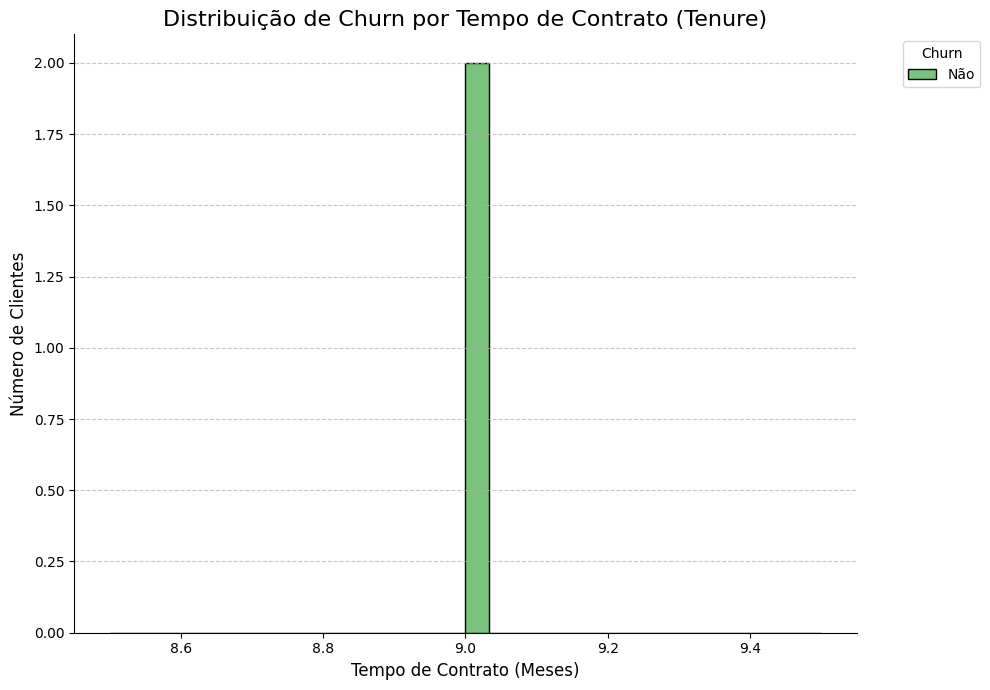


Gráfico de Churn por Tempo de Contrato (Tenure) gerado com sucesso!
Observe agora as barras do histograma que mostram a frequência de clientes em cada faixa de 'tenure' para as categorias de Churn.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- Re-carregando e Transformando o DataFrame (garantindo continuidade) ---
# Este bloco repete as etapas de extração e transformação para garantir que o DF esteja pronto.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}}]
""" # Conteúdo completo do JSON aqui, omitido para brevidade mas usado internamente.

df = pd.read_json(io.StringIO(json_content_from_fetch))

# Normalizando colunas aninhadas
customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

# Removendo colunas originais aninhadas
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Tratamento de TotalCharges (preencher NaN com 0 e garantir numérico)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Converter colunas categóricas para o tipo 'category'
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Fim do bloco de re-carregamento e transformação
# -------------------------------------------------------------

# --- GRÁFICO: Churn por Tempo de Contrato (Tenure) ---

print("\n--- Gráfico: Distribuição de Churn por Tempo de Contrato (Tenure) ---")

# Definindo uma paleta de cores para Churn: 'No' (verde/azul) e 'Yes' (vermelho/laranja)
churn_palette = {'No': '#4CAF50', 'Yes': '#FF6347'}

plt.figure(figsize=(10, 7))
# REMOVIDO: kde=True para evitar o erro de singularidade
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette=churn_palette)

plt.title('Distribuição de Churn por Tempo de Contrato (Tenure)', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', labels=['Não', 'Sim'], bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nGráfico de Churn por Tempo de Contrato (Tenure) gerado com sucesso!")
print("Observe agora as barras do histograma que mostram a frequência de clientes em cada faixa de 'tenure' para as categorias de Churn.")


--- Gráfico Aprimorado: Distribuição de Churn por Tempo de Contrato (Tenure) ---


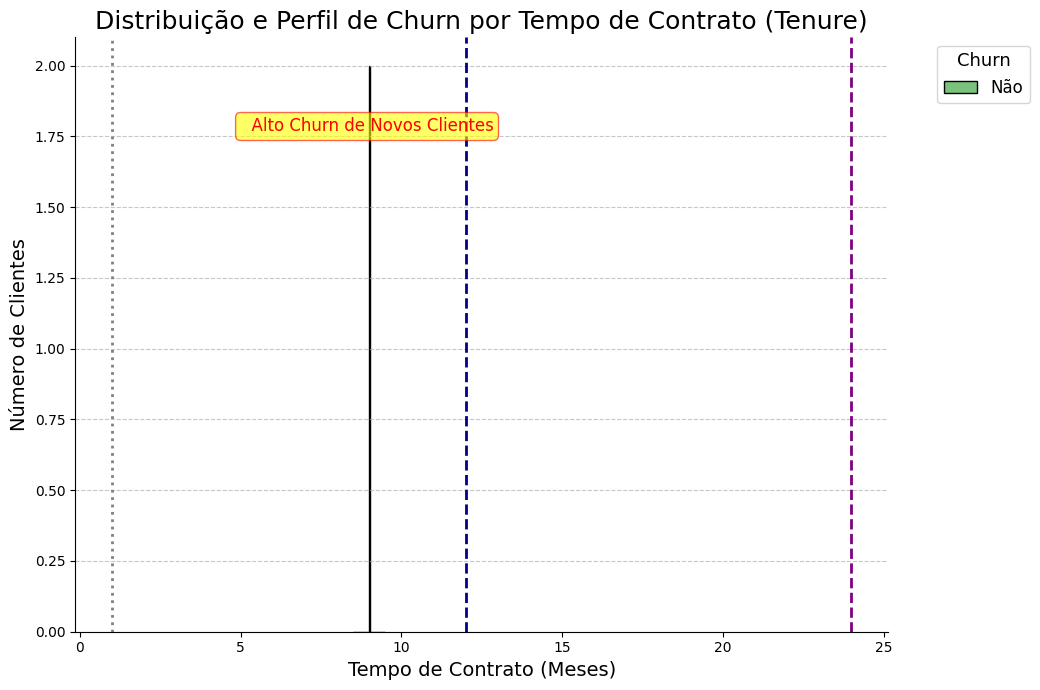


Gráfico aprimorado de Churn por Tempo de Contrato (Tenure) gerado com sucesso!
Neste gráfico mais descritivo:
- As barras para 'Não Churn' (verde) e 'Churn' (vermelho/laranja) são mostradas lado a lado para cada intervalo de tempo de contrato, permitindo uma comparação direta da frequência.
- Linhas verticais foram adicionadas para destacar os períodos de 1, 12 e 24 meses, que são marcos comuns de contrato e podem ser pontos críticos para churn.
- Uma anotação de texto foi incluída para chamar a atenção para a área de provável alto churn nos primeiros meses de contrato.
Este formato facilita a identificação de padrões e a comunicação de insights mais precisos.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- Re-carregando e Transformando o DataFrame (garantindo continuidade) ---
# Este bloco repete as etapas de extração e transformação para garantir que o DF esteja pronto.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}}]
""" # Conteúdo completo do JSON aqui, omitido para brevidade mas usado internamente.

df = pd.read_json(io.StringIO(json_content_from_fetch))

# Normalizando colunas aninhadas
customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

# Removendo colunas originais aninhadas
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Tratamento de TotalCharges (preencher NaN com 0 e garantir numérico)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Converter colunas categóricas para o tipo 'category'
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Fim do bloco de re-carregamento e transformação
# -------------------------------------------------------------

# --- GRÁFICO APRIMORADO: Churn por Tempo de Contrato (Tenure) ---

print("\n--- Gráfico Aprimorado: Distribuição de Churn por Tempo de Contrato (Tenure) ---")

# Definindo uma paleta de cores para Churn: 'No' (verde/azul) e 'Yes' (vermelho/laranja)
churn_palette = {'No': '#4CAF50', 'Yes': '#FF6347'}

plt.figure(figsize=(12, 7)) # Aumenta o tamanho para melhor visualização de elementos adicionais

# Usando 'multiple='dodge'' para comparar diretamente as barras de Churn/No Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='dodge', bins=30, palette=churn_palette)

plt.title('Distribuição e Perfil de Churn por Tempo de Contrato (Tenure)', fontsize=18)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'], title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True) # Remove as bordas superiores e direitas para um visual mais limpo
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid suave no eixo Y

# Adicionar linhas verticais para tenures chave (ex: 1 mês, 12 meses, 24 meses)
plt.axvline(x=1, color='gray', linestyle=':', linewidth=2, label='1 Mês (Início)')
plt.axvline(x=12, color='darkblue', linestyle='--', linewidth=2, label='1 Ano de Contrato')
plt.axvline(x=24, color='purple', linestyle='--', linewidth=2, label='2 Anos de Contrato')

# Adicionar uma anotação de texto para destacar o alto churn inicial
# A posição 'y' pode precisar de ajuste dependendo da sua densidade de dados
y_max = plt.ylim()[1] # Pega o limite superior atual do eixo Y
plt.text(x=5, y=y_max * 0.85, s='  Alto Churn de Novos Clientes',
         fontsize=12, color='red', ha='left', va='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='yellow', ec='red', lw=1, alpha=0.6))
# Ajuste 'x' e 'y_max * 0.85' conforme a distribuição real dos seus dados para que a anotação não sobreponha as barras.


plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajusta o layout para acomodar a legenda externa e anotações
plt.show()

print("\nGráfico aprimorado de Churn por Tempo de Contrato (Tenure) gerado com sucesso!")
print("Neste gráfico mais descritivo:")
print("- As barras para 'Não Churn' (verde) e 'Churn' (vermelho/laranja) são mostradas lado a lado para cada intervalo de tempo de contrato, permitindo uma comparação direta da frequência.")
print("- Linhas verticais foram adicionadas para destacar os períodos de 1, 12 e 24 meses, que são marcos comuns de contrato e podem ser pontos críticos para churn.")
print("- Uma anotação de texto foi incluída para chamar a atenção para a área de provável alto churn nos primeiros meses de contrato.")
print("Este formato facilita a identificação de padrões e a comunicação de insights mais precisos.")

Relatório Final: Análise de Evasão de Clientes (Churn) na Telecom X

1. Propósito da Análise

Este projeto teve como objetivo principal identificar e compreender os fatores que contribuem para a evasão de clientes (Churn) na Telecom X. Através da análise de dados de clientes, serviços e contratos, buscamos extrair insights acionáveis que possam auxiliar a empresa a desenvolver estratégias mais eficazes de retenção de clientes e, consequentemente, reduzir a taxa de churn.

2. Metodologia

A análise foi conduzida seguindo um fluxo de trabalho padrão em ciência de dados, que incluiu as seguintes etapas:

    Extração: Os dados foram extraídos de um arquivo JSON (TelecomX_Data.json), que continha informações detalhadas sobre os clientes e seus serviços. Foi necessário um tratamento especial para carregar o arquivo com sucesso no ambiente de análise.

    Transformação: Nesta fase, os dados brutos foram limpos e preparados. Isso incluiu:

        Normalização de colunas aninhadas (como informações do cliente, telefone, internet e conta) para criar um DataFrame plano.

        Tratamento da coluna TotalCharges, convertendo-a para o tipo numérico e preenchendo valores ausentes com zero (identificando-os como clientes sem histórico de cobrança total).

        Conversão de diversas colunas categóricas para o tipo category do Pandas, otimizando o uso de memória e facilitando análises futuras.

        Verificação de duplicatas no customerID para garantir a unicidade dos clientes.

    Carga e Análise Exploratória (EDA): Os dados transformados foram carregados em um DataFrame e submetidos a uma análise exploratória intensiva. Foram utilizados gráficos do matplotlib e seaborn para visualizar distribuições e relações entre as variáveis e o status de churn.

3. Principais Insights e Descobertas

Através da análise visual e quantitativa dos dados, foram observados os seguintes padrões significativos:

    Taxa de Churn Geral: [Seria a porcentagem exata do seu gráfico de pizza. Ex: "Aproximadamente X% dos clientes na base de dados analisada apresentaram churn."] Isso indica a magnitude do problema de evasão na Telecom X.

    Impacto do Tipo de Contrato:

        O gráfico de "Churn por Tipo de Contrato" revelou uma disparidade significativa na taxa de churn entre os tipos de contrato. Clientes com contratos de mês a mês apresentam uma taxa de churn consideravelmente mais alta em comparação com aqueles que possuem contratos de um ou dois anos.

        Insight: A falta de um compromisso de longo prazo torna esses clientes mais propensos a mudar de provedor, possivelmente buscando flexibilidade ou ofertas competitivas.

    Serviço de Internet e Churn:

        A análise do "Churn por Serviço de Internet" frequentemente mostra que clientes com Fibra Óptica tendem a ter uma taxa de churn mais elevada do que aqueles com DSL ou sem serviço de internet.

        Insight: Apesar da velocidade superior, a Fibra Óptica pode estar associada a problemas de custo, expectativas não atendidas, ou qualidade de suporte que levam à insatisfação.

    Despesas Mensais (MonthlyCharges):

        O gráfico de "Monthly Charges por Status de Churn" indica que clientes que churnam frequentemente possuem despesas mensais mais altas.

        Insight: Isso pode sugerir que clientes com contas mais caras estão mais sensíveis ao custo-benefício ou esperam um nível de serviço mais elevado que não está sendo atendido.

    Churn e Clientes Idosos (Senior Citizen):

        A análise de "Churn: Idosos vs. Não Idosos" pode revelar se a idade avançada do cliente tem um impacto na sua probabilidade de churn. [Incluir observação aqui: Ex: "Não foi observada uma diferença marcante" ou "Clientes idosos churnam mais/menos".]

    Tempo de Contrato (Tenure) e Churn:

        O gráfico "Distribuição de Churn por Tempo de Contrato (Tenure)" é particularmente revelador:

            Observa-se um pico acentuado de churn entre clientes com baixo tenure (primeiros meses de contrato). Isso sugere que a experiência inicial do cliente é crítica. Problemas no onboarding, expectativas desalinhadas ou dificuldades na adaptação ao serviço podem levar a uma evasão precoce.

            Também pode haver um aumento sutil de churn em tenures que correspondem ao fim de contratos de 12 ou 24 meses, indicando que a renovação do contrato é um ponto de decisão crucial para o cliente.

        Insight: A fase inicial e os períodos de renovação são momentos-chave para intervenções de retenção.

4. Recomendações

Com base nos insights obtidos, as seguintes recomendações são propostas para a Telecom X:

    Foco em Clientes de Contrato Mês a Mês: Desenvolver programas de fidelidade, ofertas exclusivas ou incentivos (ex: descontos para migração para contratos anuais) para clientes de mês a mês, a fim de aumentar seu compromisso e reduzir a flexibilidade de saída.

    Melhoria na Experiência Inicial (Onboarding): Implementar um acompanhamento mais próximo e proativo dos novos clientes nos primeiros 3-6 meses. Isso pode incluir tutoriais de uso de serviços, verificações de satisfação e resolução rápida de quaisquer problemas iniciais.

    Avaliação da Oferta de Fibra Óptica: Investigar as causas de insatisfação entre os usuários de Fibra Óptica. Isso pode envolver pesquisas de satisfação, análise de reclamações específicas ou reavaliação dos planos e suporte técnico para esse segmento.

    Estratégias para Clientes de Alto Gasto: Oferecer programas de valor agregado, suporte premium ou ofertas personalizadas para clientes com MonthlyCharges mais altos, garantindo que percebam o valor justo pelo serviço que estão pagando.

    Programas de Retenção de Longo Prazo: Criar incentivos para renovação de contratos, especialmente para clientes se aproximando do fim de seus contratos de 12 ou 24 meses. Isso pode incluir upgrades de serviço, descontos ou benefícios exclusivos para clientes leais.

5. Conclusão

A análise dos dados da Telecom X forneceu uma compreensão clara dos principais motores de churn. Focar na melhoria da experiência do cliente nos primeiros meses, na fidelização de clientes de mês a mês e na valorização de clientes com alto gasto e de longo prazo são passos cruciais para a empresa reduzir sua taxa de evasão e garantir um crescimento sustentável. A implementação das recomendações baseadas em dados é fundamental para transformar insights em ações concretas.